## Approximating 𝛑 with Monte Carlo Simulations

This is a little guide on how we can approximate the value of 𝛑 in Python.

First let's import the necessary tools:

In [1]:
import random # Random number generation
import matplotlib.pyplot as plt  # Plotting
from math import pi, pow, sqrt  # Math functions

## The Idea

We know that the area $A$ of a circle is calculated by the equation $A = \pi r^2$, where $r$ is the radius.

To make things easy, we let $r = 1$, so the area of our circle (aka unit circle) is $A = \pi$. So we just need to find the area of the circle to find the value of $\pi$. This part is where Monte Carlo comes in, but let's try and simplfy the problem for ourselves first.

It's a lot easier to find the area of a square, it's simply it's side length times itself.

If we put this circle into a box where they fix exactly, we have the length of the box to be 2. Since the radius of the circle is 1, its diameter is 2.

To simplfy this even further, we only look at a quarter of the box, so we get a $1 \times 1$ box, and now note that the area of this quarter circle is $\frac{\pi}{4}$.

With Monte Carlo, we approximate the area of two sections in the box, inside the circle and outside the circle. We just randomly generate the points in the box, then count the number inside the circle vs outside of it. The number of points in the circle out of all the points in the box is the approximately the area of circle. Then we multiply by 4 to account that it's only a quarter of a circle.

Now let's put this into practice!

---

We need to be able to calculate whether a point is within the unit circle or not, so we define the **Euclidean Distance** function.

In [2]:
def distance(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

Now we can do our simulation setup, all we need is to determine the number of points we want to generate.

In [18]:
NUMBER_OF_POINTS = 10000 # Change this value to see how the approximation changes!

In [19]:
points = ((random.uniform(0, 1), random.uniform(0, 1)) for i in range(NUMBER_OF_POINTS))

**Python note:** `points` is a *generator*, which means that nothing has actually been calculated yet. Values will just be generated on the spot when the variable is referenced later on. This saves space because we don't need to generate *everything* all at once, we only need to look at one point at a time.

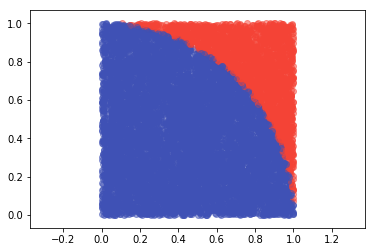

In [20]:
inside_quadrant = 0
outside_quadrant = 0

plt.axis('equal') # Ensure plot is a box

for p in points:
    dist = distance((0, 0), p)  # Distance from origin
    if dist < 1:
        inside_quadrant += 1
        plt.scatter(x=p[0], y=p[1], color="#3F51B5", alpha=0.5) # Blue points
    else:
        outside_quadrant += 1
        plt.scatter(x=p[0], y=p[1], color="#F44336", alpha=0.5) # Red points
        
plt.show() # Show the plot

In [11]:
ratio = inside_quadrant / (inside_quadrant + outside_quadrant)
approximation = ratio * 4
accuracy = (approximation / pi * 100) if (approximation <= pi) else (pi / approximation * 100)

print("𝛑 is approximately {}".format(approximation))
print("This approximation is {}% accurate".format(accuracy))

𝛑 is approximately 3.14
This approximation is 99.94930426171028% accurate
